In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from utils import *
from models import *

In [2]:
# Data retrieval and preparation.
dermatology = pd.read_csv('./datasets/dermatology.csv', sep=',')
X = dermatology.iloc[0:, :-1].values
y = dermatology.iloc[0:, -1].values
X = np.array(X)
y = np.array(y).astype(str)

In [3]:
for i in range(len(np.unique(y))):
    y[y == str(i+1)] = 'Cls_'+str(i+1)

In [4]:
#For dataset
all_x_train = []
all_y_train = []
all_x_test = []
all_y_test = []

#Hit Rates
knn_hitrate = []
dmc_hitrate = []
kmeans_hitrate = []
naivebayes_hitrate = []
linearbayes_hitrate = []
linearbayes_diagonal_hitrate = []
linearbayes_revdiagonal_hitrate = []
quadbayes_hitrate = []
quadbayes_diagonal_hitrate = []
quadbayes_average_hitrate = []

#Means
knn_mean = None
dmc_mean = None
kmeans_mean = None
naivebayes_mean = None
linearbayes_mean = None
linearbayes_diagonal_mean = None
linearbayes_revdiagonal_mean = None
quadbayes_average = None
quadbayes_diagonal_mean = None
quadbayes_average_mean = None

#Standard Deviation
knn_std = None
dmc_std = None
kmeans_std = None
naivebayes_std = None
linearbayes_std = None
linearbayes_diagonal_std = None
linearbayes_revdiagonal_std = None
quadbayes_std = None
quadbayes_diagonal_std = None
quadbayes_average_std = None

#Predictions
knn_preds = []
dmc_preds = []
kmeans_preds = []
naivebayes_preds = []
linearbayes_preds = []
linearbayes_diagonal_preds = []
linearbayes_revdiagonal_preds = []
quadbayes_preds = []
quadbayes_diagonal_preds = []
quadbayes_average_preds = []

#Confusion Matrixes
knn_cfmats = []
dmc_cfmats = []
kmeans_cfmats = []
naivebayes_cfmats = []
linearbayes_cfmats = []
linearbayes_diagonal_cfmats = []
linearbayes_revdiagonal_cfmats = []
quadbayes_cfmats = []
quadbayes_diagonal_cfmats = []
quadbayes_average_cfmats = []

#KMeans Clusters
kmeans_clusters = []

#All models
knn_models = []
dmc_models = []
kmeans_models = []
naivebayes_models = []
linearbayes_models = []
linearbayes_diagonal_models = []
linearbayes_revdiagonal_models = []
quadbayes_models = []
quadbayes_diagonal_models = []
quadbayes_average_models = []

#Auxiliar variable for finding realizations' representant
knn_closest_index = None
dmc_closest_index = None
kmeans_closest_index = None
naivebayes_closest_index = None
linearbayes_closest_index = None
linearbayes_diagonal_closest_index = None
linearbayes_revdiagonal_closest_index = None
quadbayes_closest_index = None
quadbayes_diagonal_closest_index = None
quadbayes_average_closest_index = None

In [5]:
#Other Parameters
knn_K = K = int(math.sqrt(X.shape[0]))
kmeans_K = 47 #get_best_K(X,y)

In [6]:
for realization in trange(20):
    #Separating train and test subsets from original dataset, with 80/20 proportions
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    #Normalization
    u, s = mean_and_std(X_train)
    X_train = (X_train - u) / s
    X_test = (X_test - u) / s
    
    #Shuffle
    indexes = np.random.permutation(range(len(y_train)))
    X_train = X_train[indexes]
    y_train = y_train[indexes]
    
    indexes = np.random.permutation(range(len(y_test)))
    X_test = X_test[indexes]
    y_test = y_test[indexes]
    
    #Store Xs and ys
    all_x_train.append(X_train)
    all_y_train.append(y_train)
    all_x_test.append(X_test)
    all_y_test.append(y_test)

    #Loading Models
    knn = KNearestNeighbours(knn_K)
    dmc = DMC()
    kmeans = KMeans(kmeans_K)
    naivebayes = NaiveBayes()
    linearbayes = LinearBayesClassifier()
    linearbayes_diagonal = LinearBayesClassifier('diagonal')
    linearbayes_revdiagonal = LinearBayesClassifier('reversed_diagonal')
    quadbayes = QuadraticBayesClassifier()
    quadbayes_diagonal = QuadraticBayesClassifier('diagonal')
    quadbayes_average = QuadraticBayesClassifier('average')
    
    #Training
    knn.train(X_train,y_train)
    dmc.train(X_train,y_train)
    kmeans.train(X_train,y_train)
    naivebayes.train(X_train,y_train)
    linearbayes.train(X_train,y_train)
    linearbayes_diagonal.train(X_train,y_train)
    linearbayes_revdiagonal.train(X_train,y_train)
    quadbayes.train(X_train,y_train)
    quadbayes_diagonal.train(X_train,y_train)
    quadbayes_average.train(X_train,y_train)
    
    #Predicting
    knn_preds.append(knn.predict(X_test))
    dmc_preds.append(dmc.predict(X_test))
    kmeans_preds.append(kmeans.predict(X_test))
    kmeans_clusters.append(kmeans.predict_clusters(X_test))
    naivebayes_preds.append(naivebayes.predict(X_test))
    linearbayes_preds.append(linearbayes.predict(X_test))
    linearbayes_diagonal_preds.append(linearbayes_diagonal.predict(X_test))
    linearbayes_revdiagonal_preds.append(linearbayes_revdiagonal.predict(X_test))
    quadbayes_preds.append(quadbayes.predict(X_test))
    quadbayes_diagonal_preds.append(quadbayes_diagonal.predict(X_test))
    quadbayes_average_preds.append(quadbayes_average.predict(X_test))

    #Calculate and store hitrate
    knn_hitrate.append(calc_acc2(y_test, knn_preds[-1]))
    dmc_hitrate.append(calc_acc2(y_test, dmc_preds[-1]))
    kmeans_hitrate.append(calc_acc2(y_test, kmeans_preds[-1]))
    naivebayes_hitrate.append(calc_acc2(y_test, naivebayes_preds[-1]))
    linearbayes_hitrate.append(calc_acc2(y_test, linearbayes_preds[-1]))
    linearbayes_diagonal_hitrate.append(calc_acc2(y_test, linearbayes_diagonal_preds[-1]))
    linearbayes_revdiagonal_hitrate.append(calc_acc2(y_test, linearbayes_revdiagonal_preds[-1]))
    quadbayes_hitrate.append(calc_acc2(y_test, quadbayes_preds[-1]))
    quadbayes_diagonal_hitrate.append(calc_acc2(y_test, quadbayes_diagonal_preds[-1]))
    quadbayes_average_hitrate.append(calc_acc2(y_test, quadbayes_average_preds[-1]))
    
    
    #Create and store confusion matrixes
    knn_cfmats.append(create_cfmat(y_test, knn_preds[-1]))
    dmc_cfmats.append(create_cfmat(y_test, dmc_preds[-1]))
    kmeans_cfmats.append(create_cfmat(y_test, kmeans_preds[-1]))
    naivebayes_cfmats.append(create_cfmat(y_test, naivebayes_preds[-1]))
    linearbayes_cfmats.append(create_cfmat(y_test, linearbayes_preds[-1]))
    linearbayes_diagonal_cfmats.append(create_cfmat(y_test, linearbayes_diagonal_preds[-1]))
    linearbayes_revdiagonal_cfmats.append(create_cfmat(y_test, quadbayes_preds[-1]))
    quadbayes_cfmats.append(create_cfmat(y_test, quadbayes_preds[-1]))
    quadbayes_diagonal_cfmats.append(create_cfmat(y_test, quadbayes_diagonal_preds[-1]))
    quadbayes_average_cfmats.append(create_cfmat(y_test, quadbayes_average_preds[-1]))
    
    #Store Models
    knn_models.append(knn)
    dmc_models.append(dmc)
    kmeans_models.append(kmeans)
    naivebayes_models.append(naivebayes)
    linearbayes_models.append(linearbayes)
    linearbayes_diagonal_models.append(linearbayes_diagonal)
    linearbayes_revdiagonal_models.append(linearbayes_revdiagonal)
    quadbayes_models.append(quadbayes)
    quadbayes_diagonal_models.append(quadbayes_diagonal)
    quadbayes_average_models.append(quadbayes_average)

  0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
#Média e Desvio Padrão das Taxas de Acerto
knn_mean, knn_std = mean_and_std(knn_hitrate)
dmc_mean, dmc_std = mean_and_std(dmc_hitrate)
kmeans_mean, kmeans_std = mean_and_std(kmeans_hitrate)
naivebayes_mean, naivebayes_std = mean_and_std(naivebayes_hitrate)
linearbayes_mean, linearbayes_std = mean_and_std(linearbayes_hitrate)
linearbayes_diagonal_mean, linearbayes_diagonal_std = mean_and_std(linearbayes_diagonal_hitrate)
linearbayes_revdiagonal_mean, linearbayes_revdiagonal_std = mean_and_std(linearbayes_revdiagonal_hitrate)
quadbayes_average, quadbayes_std = mean_and_std(quadbayes_hitrate)
quadbayes_diagonal_mean, quadbayes_diagonal_std = mean_and_std(quadbayes_diagonal_hitrate)
quadbayes_average_mean, quadbayes_average_std = mean_and_std(quadbayes_average_hitrate)

In [8]:
#Index do Representante
knn_closest_index = get_closest(knn_mean,knn_hitrate)
dmc_closest_index = get_closest(dmc_mean,dmc_hitrate)
kmeans_closest_index = get_closest(kmeans_mean,kmeans_hitrate)
naivebayes_closest_index = get_closest(naivebayes_mean,naivebayes_hitrate)
linearbayes_closest_index = get_closest(linearbayes_mean,linearbayes_hitrate)
linearbayes_diagonal_closest_index = get_closest(linearbayes_diagonal_mean,linearbayes_diagonal_hitrate)
linearbayes_revdiagonal_closest_index = get_closest(linearbayes_revdiagonal_mean,linearbayes_revdiagonal_hitrate)
quadbayes_closest_index = get_closest(quadbayes_average,quadbayes_hitrate)
quadbayes_diagonal_closest_index = get_closest(quadbayes_diagonal_mean,quadbayes_diagonal_hitrate)
quadbayes_average_closest_index = get_closest(quadbayes_average_mean,quadbayes_average_hitrate)

In [9]:
#X_test do representante
knn_x_test = all_x_test[knn_closest_index]
dmc_x_test = all_x_test[dmc_closest_index]
kmeans_x_test = all_x_test[kmeans_closest_index]
naivebayes_x_test = all_x_test[naivebayes_closest_index]
linearbayes_x_test = all_x_test[linearbayes_closest_index]
linearbayes_diagonal_x_test = all_x_test[linearbayes_diagonal_closest_index]
linearbayes_revdiagonal_x_test = all_x_test[linearbayes_revdiagonal_closest_index]
quadbayes_x_test = all_x_test[quadbayes_closest_index]
quadbayes_diagonal_x_test = all_x_test[quadbayes_diagonal_closest_index]
quadbayes_average_x_test = all_x_test[quadbayes_average_closest_index]

In [10]:
#y_test do representante
knn_y_test = all_y_test[knn_closest_index]
dmc_y_test = all_y_test[dmc_closest_index]
kmeans_y_test = all_y_test[kmeans_closest_index]
naivebayes_y_test = all_y_test[naivebayes_closest_index]
linearbayes_y_test = all_y_test[linearbayes_closest_index]
linearbayes_diagonal_y_test = all_y_test[linearbayes_diagonal_closest_index]
linearbayes_revdiagonal_y_test = all_y_test[linearbayes_revdiagonal_closest_index]
quadbayes_y_test = all_y_test[quadbayes_closest_index]
quadbayes_diagonal_y_test = all_y_test[quadbayes_diagonal_closest_index]
quadbayes_average_y_test = all_y_test[quadbayes_average_closest_index]

In [11]:
#Predições resultantes
knn_prediction = knn_preds[knn_closest_index]
dmc_prediction = dmc_preds[dmc_closest_index]
kmeans_prediction = kmeans_preds[kmeans_closest_index]
naivebayes_prediction = naivebayes_preds[naivebayes_closest_index]
linearbayes_prediction = linearbayes_preds[linearbayes_closest_index]
linearbayes_diagonal_prediction = linearbayes_diagonal_preds[linearbayes_diagonal_closest_index]
linearbayes_revdiagonal_prediction = linearbayes_revdiagonal_preds[linearbayes_revdiagonal_closest_index]
quadbayes_prediction = quadbayes_preds[quadbayes_closest_index]
quadbayes_diagonal_prediction = quadbayes_diagonal_preds[quadbayes_diagonal_closest_index]
quadbayes_average_prediction = quadbayes_average_preds[quadbayes_average_closest_index]

In [12]:
#Taxa de Acerto do Representante
knn_accuracy = knn_hitrate[knn_closest_index]
dmc_accuracy = dmc_hitrate[dmc_closest_index]
kmeans_accuracy = kmeans_hitrate[kmeans_closest_index]
naivebayes_accuracy = naivebayes_hitrate[naivebayes_closest_index]
linearbayes_accuracy = linearbayes_hitrate[linearbayes_closest_index]
linearbayes_diagonal_accuracy = linearbayes_diagonal_hitrate[linearbayes_diagonal_closest_index]
linearbayes_revdiagonal_accuracy = linearbayes_revdiagonal_hitrate[linearbayes_revdiagonal_closest_index]
quadbayes_accuracy = quadbayes_hitrate[quadbayes_closest_index]
quadbayes_diagonal_accuracy = quadbayes_diagonal_hitrate[quadbayes_diagonal_closest_index]
quadbayes_average_accuracy = quadbayes_average_hitrate[quadbayes_average_closest_index]

In [13]:
#Modelo do Representante
knn_model = knn_models[knn_closest_index]
dmc_model = dmc_models[dmc_closest_index]
kmeans_model = kmeans_models[kmeans_closest_index]
naivebayes_model = naivebayes_models[naivebayes_closest_index]
linearbayes_model = linearbayes_models[linearbayes_closest_index]
linearbayes_diagonal_model = linearbayes_diagonal_models[linearbayes_diagonal_closest_index]
linearbayes_revdiagonal_model = linearbayes_revdiagonal_models[linearbayes_revdiagonal_closest_index]
quadbayes_model = quadbayes_models[quadbayes_closest_index]
quadbayes_diagonal_model = quadbayes_diagonal_models[quadbayes_diagonal_closest_index]
quadbayes_average_model = quadbayes_average_models[quadbayes_average_closest_index]

In [14]:
#Tabela de Taxas de Acerto por Modelo
hitrates = {'KNN': knn_hitrate,
            'DMC': dmc_hitrate,
            'KMeans': kmeans_hitrate,
            'NaiveBayes': naivebayes_hitrate,
            'LinearBayes': linearbayes_hitrate,
            'LBDiagonal': linearbayes_diagonal_hitrate,
            'LBRevDiagonal': linearbayes_revdiagonal_hitrate,
            'QuadBayes': quadbayes_hitrate,
            'QBDiagonal': quadbayes_diagonal_hitrate,
            'QBAverage' :quadbayes_average_hitrate
            }
hitrate_df = pd.DataFrame.from_dict(hitrates)
display(hitrate_df)

,KNN,DMC,KMeans,NaiveBayes,LinearBayes,LBDiagonal,LBRevDiagonal,QuadBayes,QBDiagonal,QBAverage
0,0.770270,0.500000,0.689189,0.783784,0.972973,0.972973,0.500000,0.878378,0.810811,0.945946
1,0.770270,0.459459,0.581081,0.810811,0.959459,0.959459,0.527027,0.864865,0.797297,0.945946
2,0.797297,0.445946,0.702703,0.905405,0.918919,0.959459,0.418919,0.851351,0.932432,0.945946
3,0.824324,0.486486,0.648649,0.905405,1.000000,0.986486,0.472973,0.932432,0.824324,1.000000
4,0.783784,0.540541,0.648649,0.878378,0.972973,0.972973,0.581081,0.864865,0.945946,0.986486
5,0.770270,0.391892,0.662162,0.756757,0.986486,0.986486,0.378378,0.945946,0.770270,0.986486
6,0.702703,0.554054,0.662162,0.851351,0.945946,0.959459,0.459459,0.945946,0.851351,0.972973
7,0.810811,0.567568,0.648649,0.837838,0.945946,0.945946,0.472973,0.864865,0.770270,0.932432
8,0.689189,0.472973,0.648649,0.878378,0.959459,0.972973,0.391892,0.932432,0.797297,0.972973
9,0.770270,0.500000,0.716216,0.770270,0.918919,0.905405,0.445946,0.878378,0.918919,0.905405


In [15]:
#Acurácia (Taxa de Acerto Média), Taxa de Acerto do Representante e Desvio Padrão das Taxas de Acerto
accuracies = {'': ['Accuracy','Representant HitRate','Standard Deviation'],
            'KNN': [knn_mean, knn_accuracy, knn_std],
            'DMC': [dmc_mean, dmc_accuracy, dmc_std,],
            'KMeans': [kmeans_mean, kmeans_accuracy, kmeans_std],
            'NaiveBayes': [naivebayes_mean, naivebayes_accuracy, naivebayes_std],
            'LinearBayes': [linearbayes_mean, linearbayes_accuracy, linearbayes_std],
            'LBDiagonal': [linearbayes_diagonal_mean, linearbayes_diagonal_accuracy, linearbayes_diagonal_std],
            'LBRevDiagonal': [linearbayes_revdiagonal_mean, linearbayes_revdiagonal_accuracy, linearbayes_revdiagonal_std],
            'QuadBayes': [quadbayes_average, quadbayes_accuracy, quadbayes_std],
            'QBDiagonal': [quadbayes_diagonal_mean, quadbayes_diagonal_accuracy, quadbayes_diagonal_std],
            'QBAverage' :[quadbayes_average_mean, quadbayes_average_accuracy, quadbayes_average_std],
            }
accuracy_df = pd.DataFrame.from_dict(accuracies)
display(accuracy_df)

,,KNN,DMC,KMeans,NaiveBayes,LinearBayes,LBDiagonal,LBRevDiagonal,QuadBayes,QBDiagonal,QBAverage
0,Accuracy,0.768919,0.494595,0.646622,0.833784,0.962162,0.966892,0.458784,0.889189,0.858108,0.962838
1,Representant HitRate,0.770270,0.500000,0.648649,0.837838,0.959459,0.972973,0.459459,0.891892,0.851351,0.959459
2,Standard Deviation,0.046401,0.054625,0.051860,0.043180,0.022450,0.021141,0.059594,0.037156,0.074078,0.023357


# Confusion Matrixes

In [16]:
def plotconfusion_matrix(confusion_matrix, title, hitrate, std, labels):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(confusion_matrix, annot=True,cmap='Blues',fmt="d",ax=ax)
    ax.set_title(f'{title}\nAccuracy {hitrate}, STD = {std}');
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('\nExpected');
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.savefig('./confusion_matrixes/Dermatology/'+title)
    plt.show()

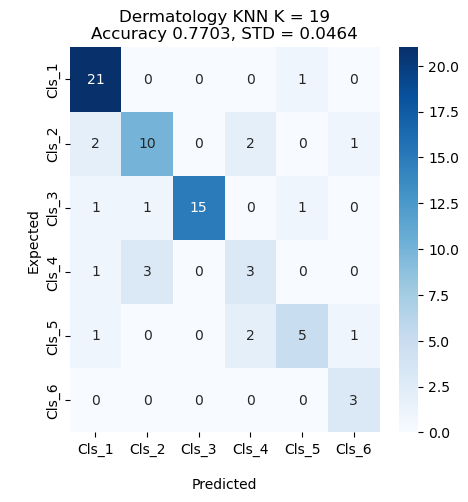

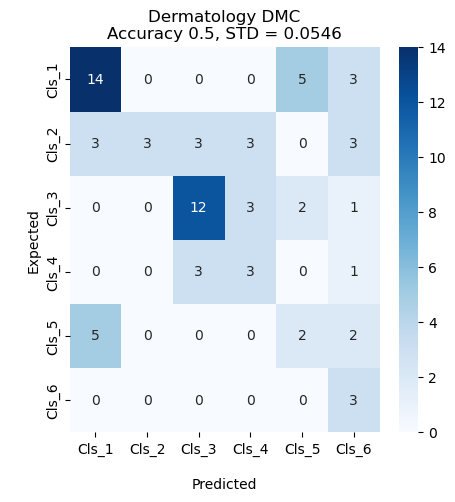

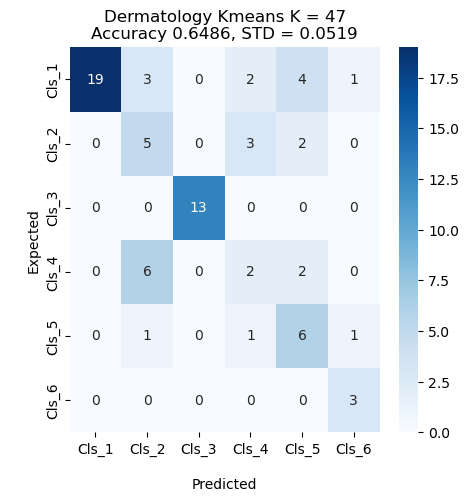

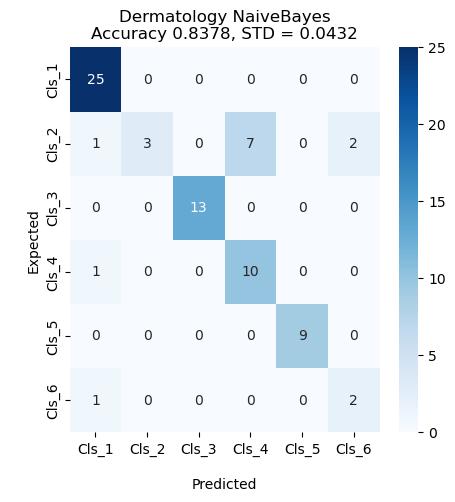

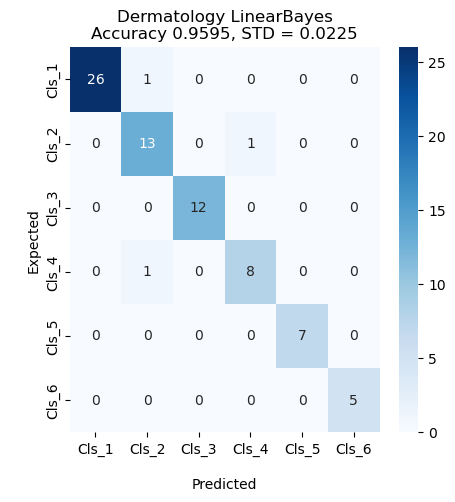

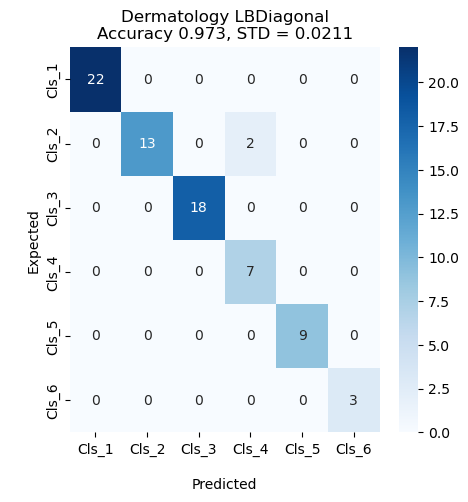

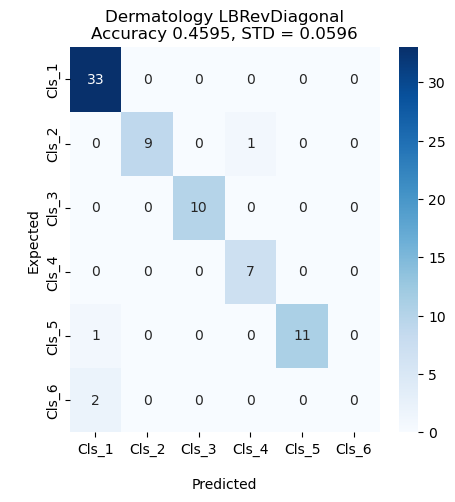

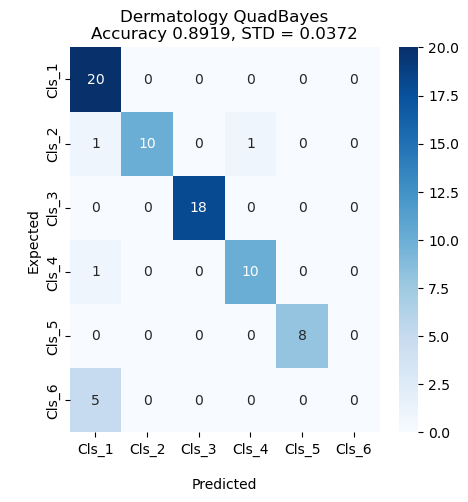

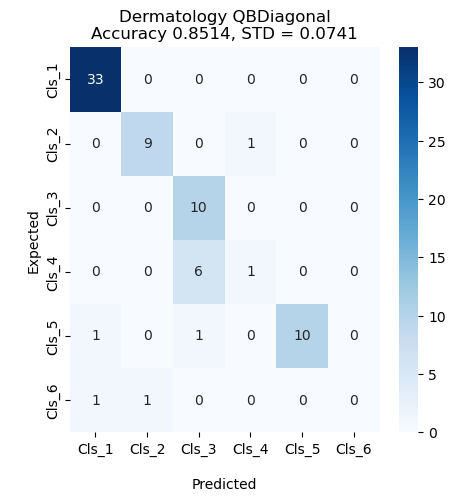

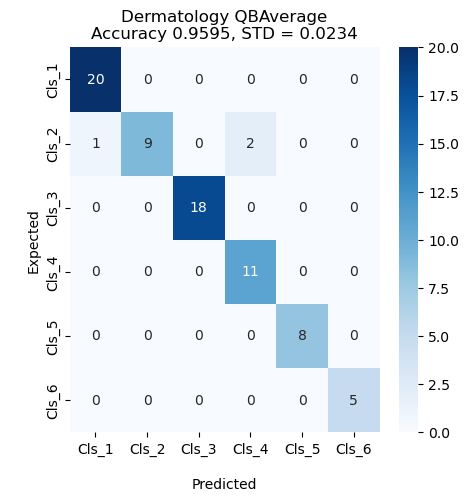

In [17]:
labels = np.unique(all_y_test[knn_closest_index])
#confusion_matrix, title, hitrate, std, labels
plotconfusion_matrix(knn_cfmats[knn_closest_index],'Dermatology KNN K = '+str(knn_K), round(knn_hitrate[knn_closest_index],4), round(knn_std,4),labels)
plotconfusion_matrix(dmc_cfmats[dmc_closest_index],'Dermatology DMC', round(dmc_hitrate[dmc_closest_index],4), round(dmc_std,4),labels)
plotconfusion_matrix(kmeans_cfmats[kmeans_closest_index],'Dermatology Kmeans K = '+str(kmeans_K), round(kmeans_hitrate[kmeans_closest_index],4), round(kmeans_std,4),labels)
plotconfusion_matrix(naivebayes_cfmats[naivebayes_closest_index],'Dermatology NaiveBayes', round(naivebayes_hitrate[naivebayes_closest_index],4), round(naivebayes_std,4),labels)
plotconfusion_matrix(linearbayes_cfmats[linearbayes_closest_index],'Dermatology LinearBayes', round(linearbayes_hitrate[linearbayes_closest_index],4), round(linearbayes_std,4),labels)
plotconfusion_matrix(linearbayes_diagonal_cfmats[linearbayes_diagonal_closest_index],'Dermatology LBDiagonal', round(linearbayes_diagonal_hitrate[linearbayes_diagonal_closest_index],4), round(linearbayes_diagonal_std,4),labels)
plotconfusion_matrix(linearbayes_revdiagonal_cfmats[linearbayes_revdiagonal_closest_index],'Dermatology LBRevDiagonal', round(linearbayes_revdiagonal_hitrate[linearbayes_revdiagonal_closest_index],4), round(linearbayes_revdiagonal_std,4),labels)
plotconfusion_matrix(quadbayes_cfmats[quadbayes_closest_index],'Dermatology QuadBayes', round(quadbayes_hitrate[quadbayes_closest_index],4), round(quadbayes_std,4),labels)
plotconfusion_matrix(quadbayes_diagonal_cfmats[quadbayes_diagonal_closest_index],'Dermatology QBDiagonal', round(quadbayes_diagonal_hitrate[quadbayes_diagonal_closest_index],4), round(quadbayes_diagonal_std,4),labels)
plotconfusion_matrix(quadbayes_average_cfmats[quadbayes_average_closest_index],'Dermatology QBAverage', round(quadbayes_average_hitrate[quadbayes_average_closest_index],4), round(quadbayes_average_std,4),labels)


# Plots

In [18]:
def make_plot(classifier,title,data,data_labels,labels):
    step = .02
    cmap_base = ListedColormap(['lightcoral', 'cornflowerblue', 'bisque','white','plum','lightgreen'])
    cmap_labels = ['red', 'blue', 'orange','silver','violet','green']

    #Find Minimum and Maximum value for the data
    x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

    #Create Grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),np.arange(y_min, y_max, step))

    #Obtain predicted values for each of the grid's points
    Z = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()]))
    for i in range(len(np.unique(Z))):
        Z[np.where(Z == np.unique(Z)[i])] = str(i)
    Z = Z.astype(int)
    Z = Z.reshape(xx.shape)

    #Make Contours
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_base)

    #Create a Scatterplot with the data
    #labels = np.unique(data_labels)
    
    for i in range(len(labels)):
        plt.scatter(data[data_labels == labels[i], 0], data[data_labels == labels[i], 1],
                    facecolor=cmap_labels[i], label=labels[i],alpha=0.6, edgecolor="black")
    
    plt.legend()

    #Set the limits for the variables
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(title)

    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.savefig('./decision_surfaces/Dermatology/'+title)
    plt.show()

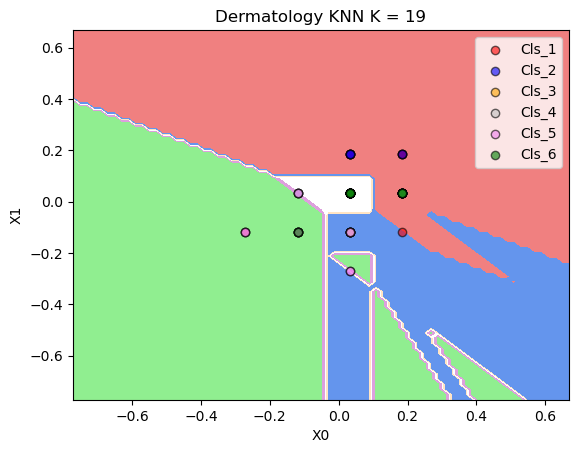

In [19]:
knn_2C = KNearestNeighbours(knn_K)
knn_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(knn_2C,'Dermatology KNN K = '+str(knn_K),all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

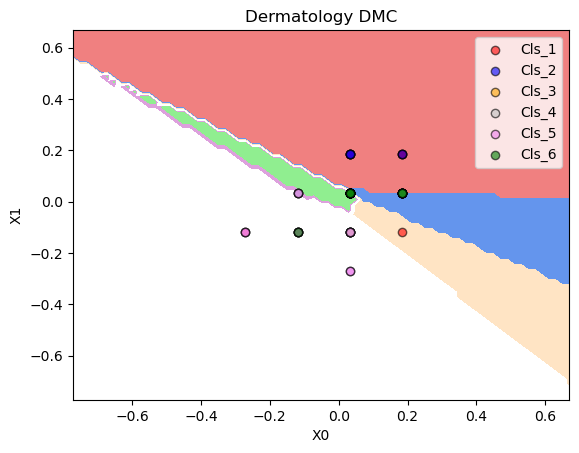

In [20]:
dmc_2C = DMC()
dmc_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(dmc_2C,'Dermatology DMC',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

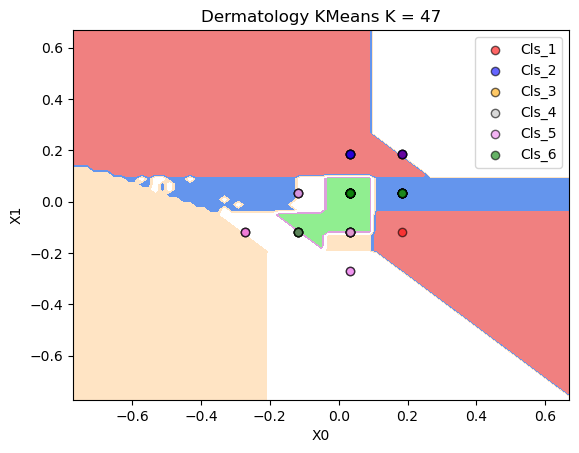

In [21]:
kmeans_2C = KMeans(kmeans_K)
kmeans_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(kmeans_2C,'Dermatology KMeans K = '+str(kmeans_K),all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

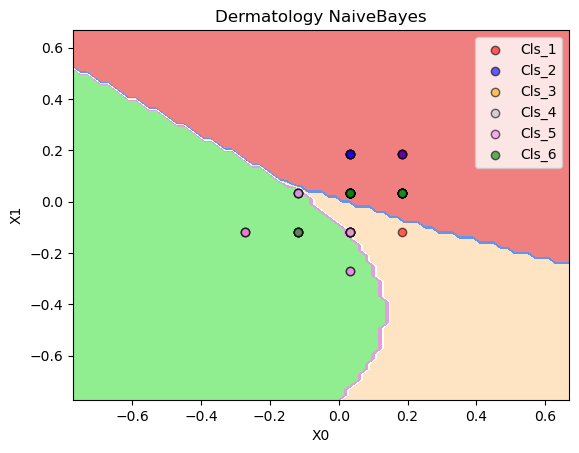

In [22]:
naivebayes_2C = NaiveBayes()
naivebayes_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(naivebayes_2C,'Dermatology NaiveBayes',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

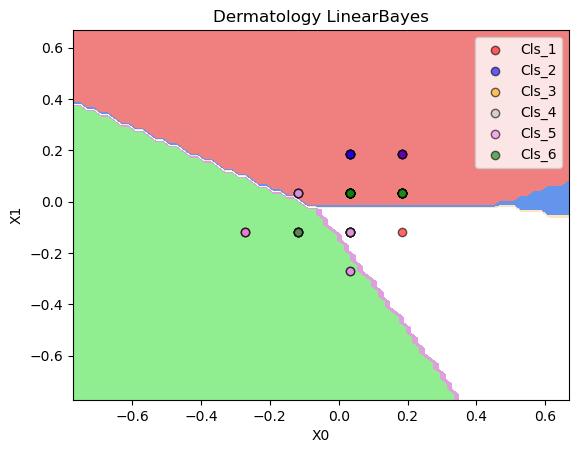

In [23]:
linearbayes_2C = LinearBayesClassifier()
linearbayes_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(linearbayes_2C,'Dermatology LinearBayes',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

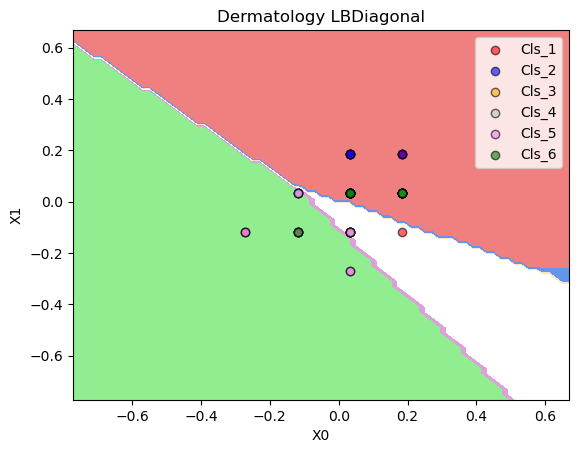

In [24]:
linearbayes_diagonal_2C = LinearBayesClassifier('diagonal')
linearbayes_diagonal_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(linearbayes_diagonal_2C,'Dermatology LBDiagonal',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

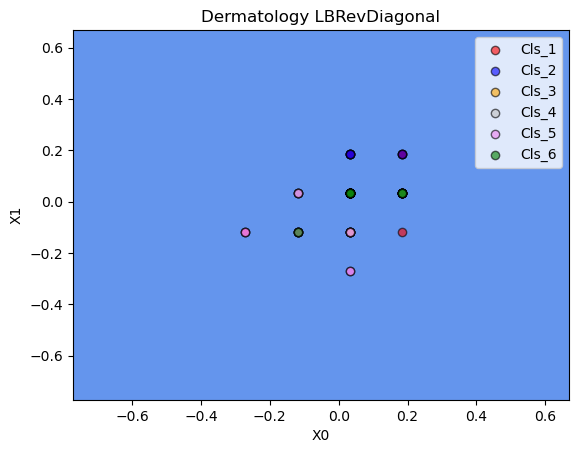

In [25]:
linearbayes_revdiagonal_2C = LinearBayesClassifier('reversed_diagonal')
linearbayes_revdiagonal_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(linearbayes_revdiagonal_2C,'Dermatology LBRevDiagonal',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

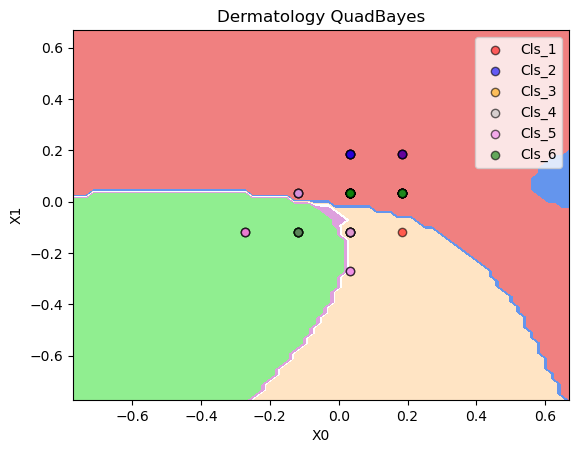

In [26]:
quadbayes_2C = QuadraticBayesClassifier()
quadbayes_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(quadbayes_2C,'Dermatology QuadBayes',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

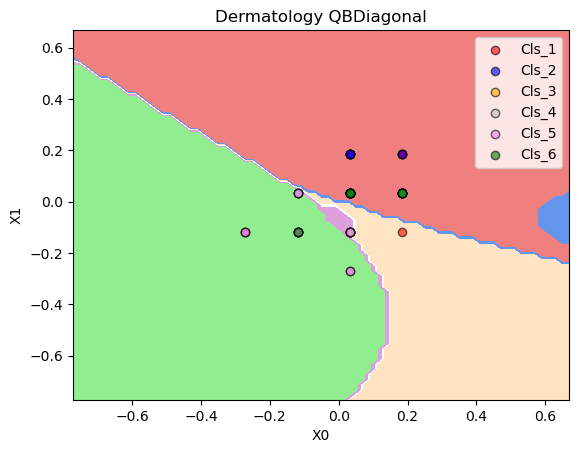

In [27]:
quadbayes_diagonal_2C = QuadraticBayesClassifier('diagonal')
quadbayes_diagonal_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(quadbayes_diagonal_2C,'Dermatology QBDiagonal',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

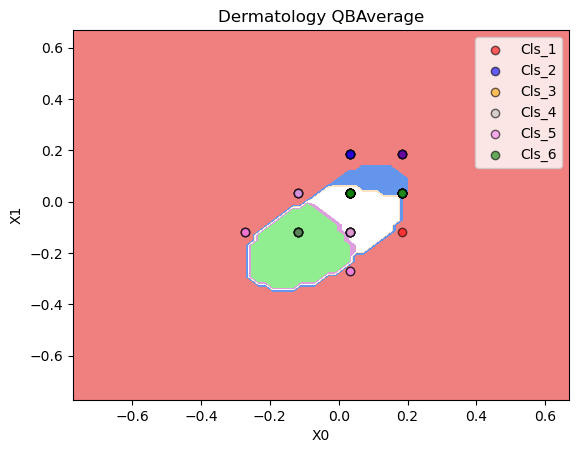

In [28]:
quadbayes_average_2C = QuadraticBayesClassifier('average')
quadbayes_average_2C.train(all_x_train[-1][:,[0,1]],all_y_train[-1])
make_plot(quadbayes_average_2C,'Dermatology QBAverage',all_x_test[-1][:,[0,1]],all_y_test[-1], np.unique(all_y_test[-1]))

# Training and Test Data

In [29]:
trainingData = {'X0':np.ravel(all_x_train[-1][:,[0]]),
            'X1':np.ravel(all_x_train[-1][:,[1]]),
            'Labels':   all_y_train[-1]
}
trainingDf = pd.DataFrame.from_dict(trainingData)
display(trainingDf)

,X0,X1,Labels
0,0.032317,-0.119526,Cls_1
1,-0.119526,-0.119526,Cls_3
2,0.032317,0.032317,Cls_5
3,0.032317,-0.119526,Cls_4
4,-0.119526,-0.119526,Cls_3
...,...,...,...
287,0.032317,0.032317,Cls_3
288,0.032317,-0.119526,Cls_4
289,0.184160,0.032317,Cls_3
290,0.032317,0.032317,Cls_4


In [30]:
testData = {'X0':np.ravel(all_x_test[-1][:,[0]]),
            'X1':np.ravel(all_x_test[-1][:,[1]]),
            'Labels':   all_y_test[-1]
}
testDf = pd.DataFrame.from_dict(testData)
display(testDf)

,X0,X1,Labels
0,-0.119526,0.032317,Cls_2
1,0.032317,0.032317,Cls_1
2,0.032317,0.032317,Cls_6
3,0.184160,0.184160,Cls_2
4,0.184160,0.184160,Cls_1
...,...,...,...
69,-0.271369,-0.119526,Cls_1
70,0.184160,0.032317,Cls_6
71,0.184160,0.032317,Cls_2
72,0.032317,0.032317,Cls_2
